In [15]:
#Preprocessing
import pandas as pd

# Load dataset
file_path = 'Dl_Project/Healthcare Providers.csv'
data = pd.read_csv(file_path)
print(data)

         index  National Provider Identifier  \
0      8774979                    1891106191   
1      3354385                    1346202256   
2      3001884                    1306820956   
3      7594822                    1770523540   
4       746159                    1073627758   
...        ...                           ...   
99995  3837311                    1386938868   
99996  2079360                    1215091327   
99997  8927965                    1902868185   
99998  8854571                    1891941183   
99999  3547535                    1356772156   

      Last Name/Organization Name of the Provider First Name of the Provider  \
0                                     UPADHYAYULA                  SATYASREE   
1                                           JONES                      WENDY   
2                                        DUROCHER                    RICHARD   
3                                         FULLARD                     JASPER   
4                      

In [2]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [3]:
# Example classification (modify based on domain knowledge if needed)
nominal_columns = [
    'Gender of the Provider', 'Entity Type of the Provider', 
    'Provider Type', 'Medicare Participation Indicator'
]

In [4]:
ordinal_columns = [
    'HCPCS Drug Indicator'  # Example: 'N' and 'Y' could be treated as ordinal
]

In [5]:
high_cardinality_columns = [
    'Last Name/Organization Name of the Provider', 'First Name of the Provider',
    'City of the Provider', 'State Code of the Provider'
]


In [6]:
# Encoding
# Nominal encoding
encoded_nominal = pd.get_dummies(data[nominal_columns], drop_first=True)

In [7]:
# Ordinal encoding
ordinal_mappings = {'N': 0, 'Y': 1}  # Example for HCPCS Drug Indicator
data['HCPCS Drug Indicator'] = data['HCPCS Drug Indicator'].map(ordinal_mappings)

In [8]:
# High-cardinality encoding: Frequency Encoding
for col in high_cardinality_columns:
    freq_encoding = data[col].value_counts(normalize=True)
    data[f'{col}_freq'] = data[col].map(freq_encoding)

In [9]:
# Drop original columns post-encoding
final_data = data.drop(columns=nominal_columns + high_cardinality_columns)
final_data = pd.concat([final_data, encoded_nominal], axis=1)

In [11]:
# Save the preprocessed dataset
output_file_path = 'Dl_Project/Healthcare1_Providers.csv'
final_data.to_csv(output_file_path, index=False)

In [12]:
print(f"Preprocessing complete. Saved to {output_file_path}")

Preprocessing complete. Saved to Dl_Project/Healthcare1_Providers.csv


In [14]:
print(pd.read_csv(output_file_path))

         index  National Provider Identifier Middle Initial of the Provider  \
0      8774979                    1891106191                            NaN   
1      3354385                    1346202256                              P   
2      3001884                    1306820956                              W   
3      7594822                    1770523540                            NaN   
4       746159                    1073627758                              E   
...        ...                           ...                            ...   
99995  3837311                    1386938868                            NaN   
99996  2079360                    1215091327                              S   
99997  8927965                    1902868185                            NaN   
99998  8854571                    1891941183                            NaN   
99999  3547535                    1356772156                            NaN   

      Credentials of the Provider Street Address 1 

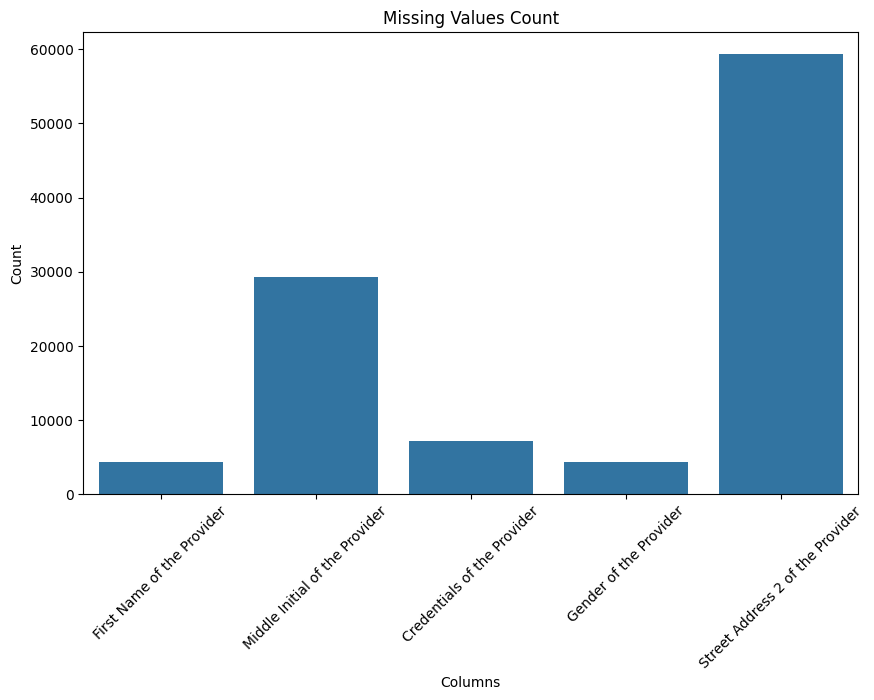

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.title('Missing Values Count')
plt.ylabel('Count')
plt.xlabel('Columns')
plt.show()


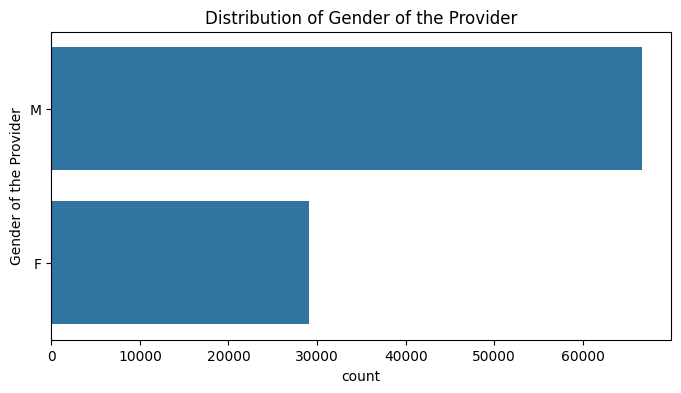

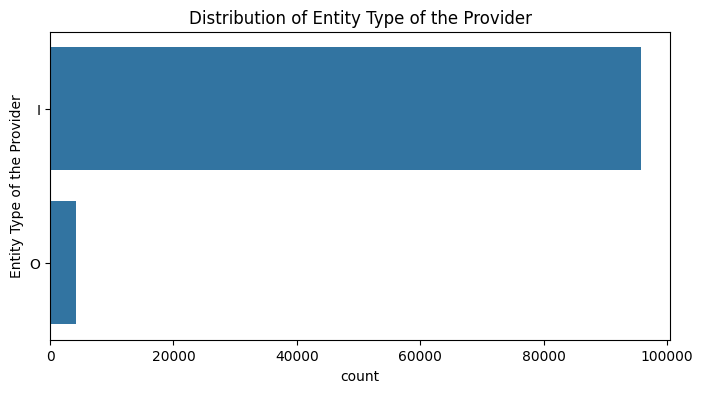

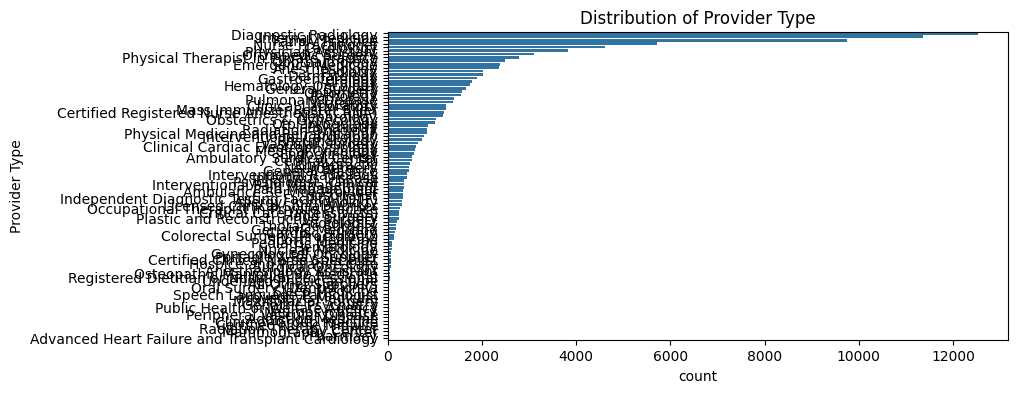

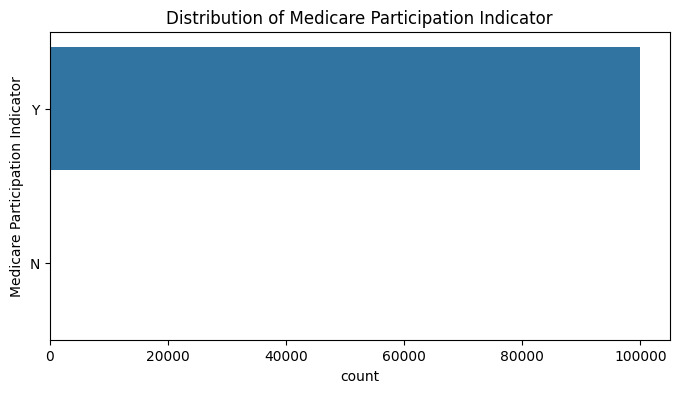

In [17]:
# Example for nominal columns
for col in nominal_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


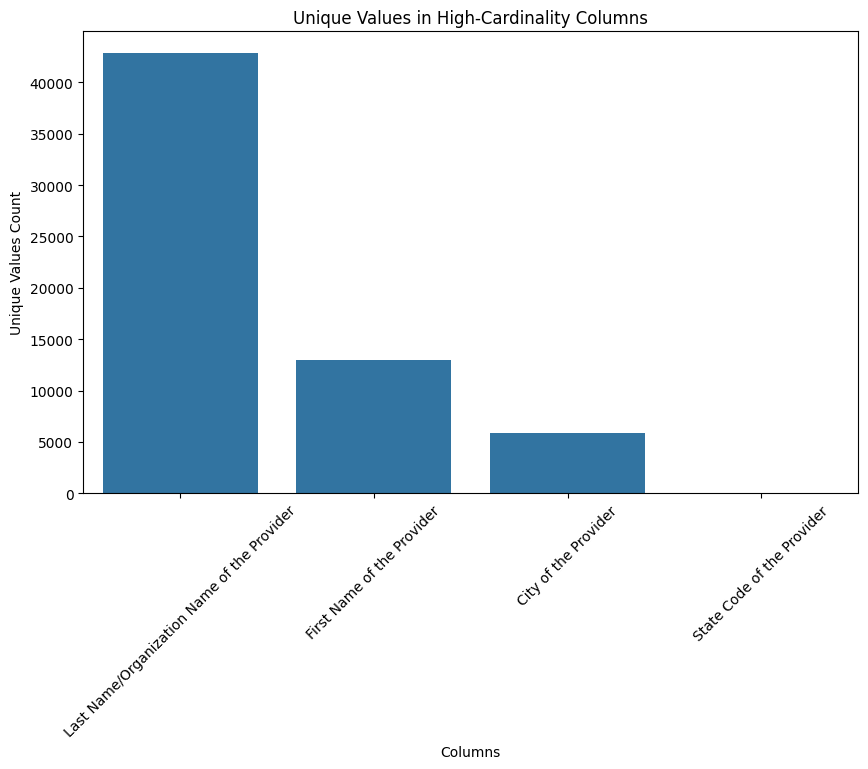

In [18]:
# High-cardinality columns unique values
unique_counts = {col: data[col].nunique() for col in high_cardinality_columns}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(unique_counts.keys()), y=list(unique_counts.values()))
plt.xticks(rotation=45)
plt.title('Unique Values in High-Cardinality Columns')
plt.ylabel('Unique Values Count')
plt.xlabel('Columns')
plt.show()


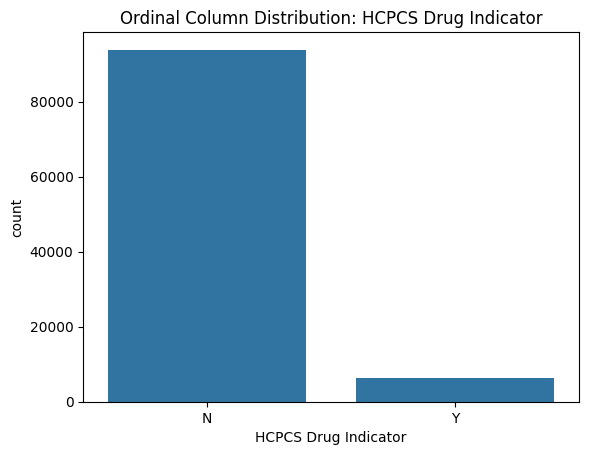

In [19]:
# Example for HCPCS Drug Indicator
sns.countplot(x='HCPCS Drug Indicator', data=data)
plt.title('Ordinal Column Distribution: HCPCS Drug Indicator')
plt.show()


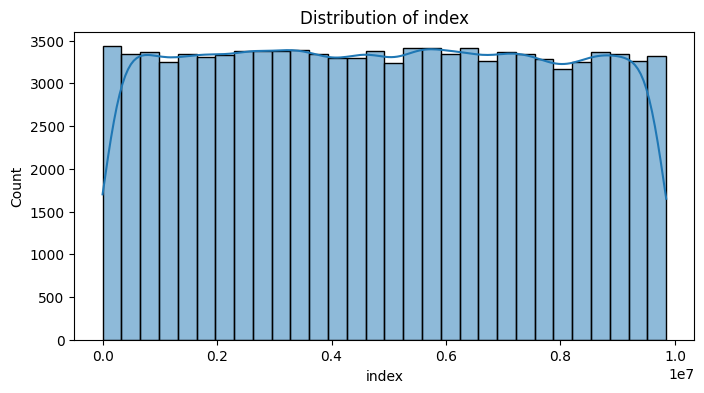

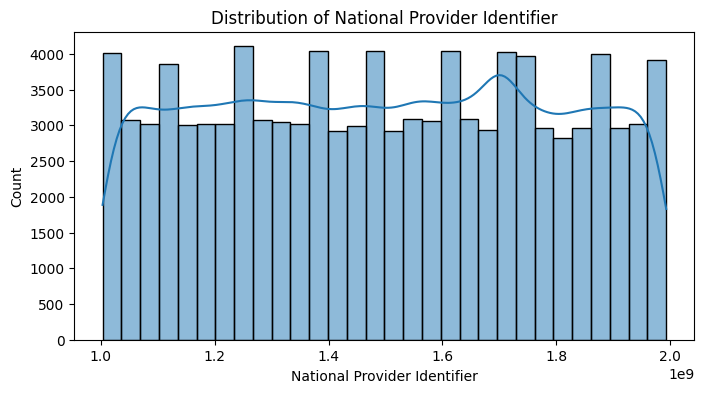

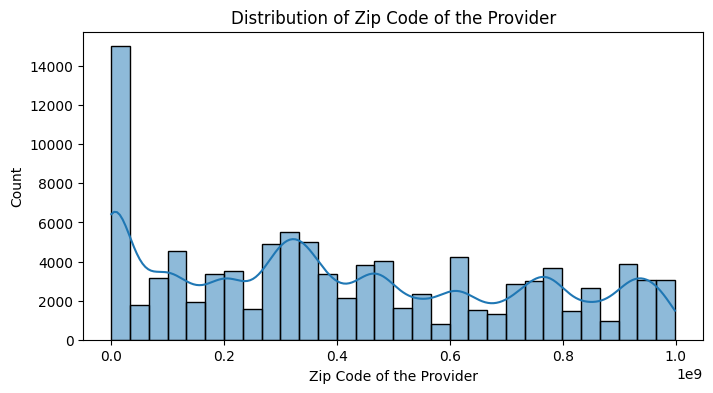

In [20]:
# Numerical column distributions
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


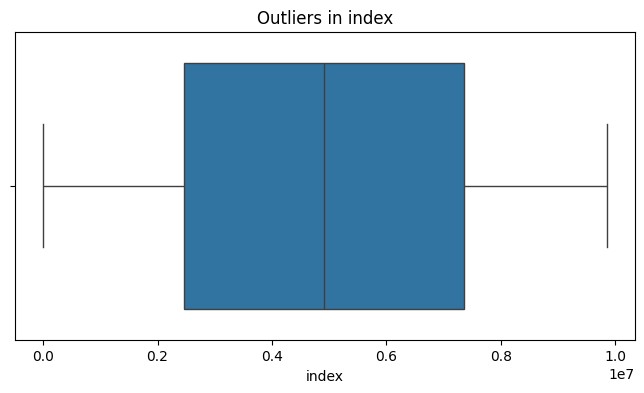

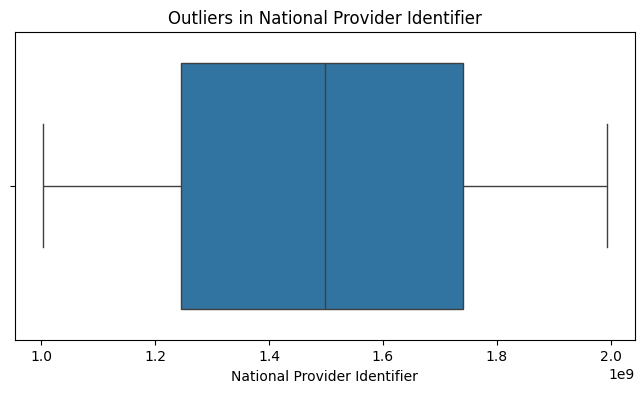

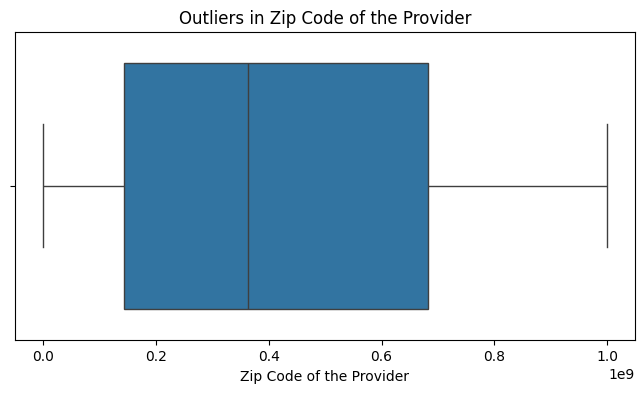

In [21]:
# Boxplot for outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Outliers in {col}')
    plt.show()


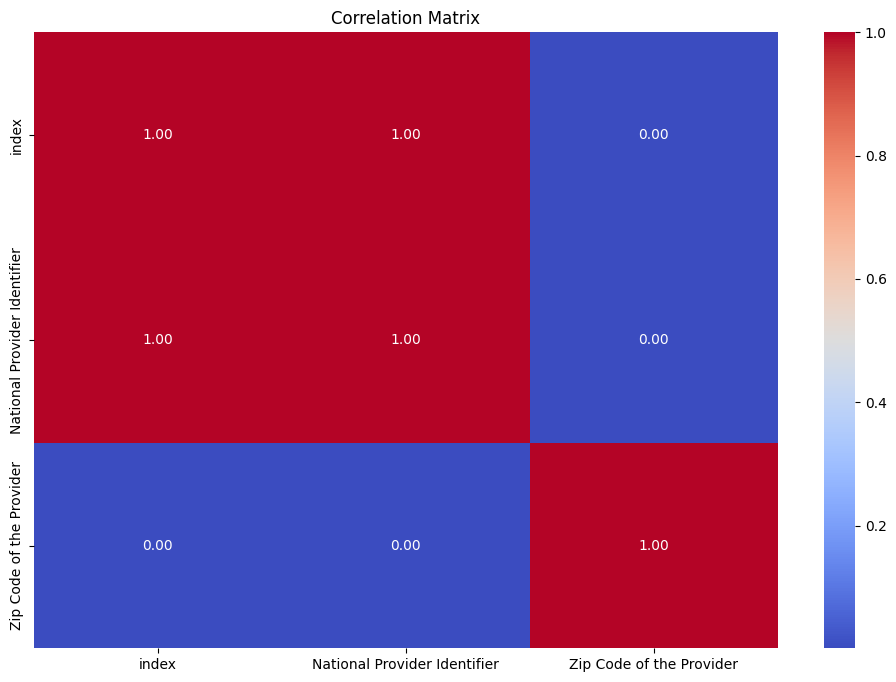

In [23]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
plt.figure(figsize=(12, 8))
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original and preprocessed datasets
original_data = pd.read_csv('Dl_Project/Healthcare Providers.csv')
preprocessed_data = pd.read_csv('Dl_Project/Healthcare1_Providers.csv')

In [3]:
# 1. **Basic Information Comparison**
original_shape = original_data.shape
preprocessed_shape = preprocessed_data.shape

C:\Users\RAMANA JSRA\AppData\Local\Temp\ipykernel_7344\3768035230.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Rows', data=comparison_df, ax=ax[0], palette='viridis')
C:\Users\RAMANA JSRA\AppData\Local\Temp\ipykernel_7344\3768035230.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Columns', data=comparison_df, ax=ax[1], palette='magma')


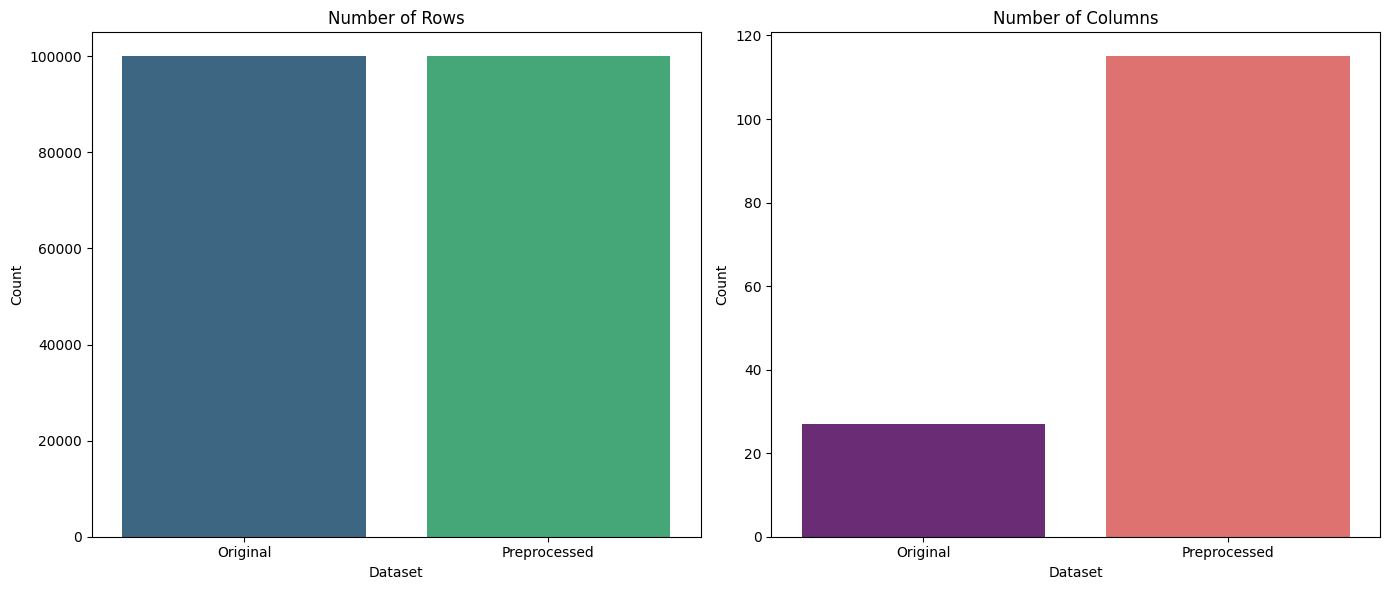

In [12]:
# Plot dataset size
comparison = {
    'Dataset': ['Original', 'Preprocessed'],
    'Rows': [original_shape[0], preprocessed_shape[0]],
    'Columns': [original_shape[1], preprocessed_shape[1]]
}

comparison_df = pd.DataFrame(comparison)

# Bar chart for row and column counts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Rows comparison
sns.barplot(x='Dataset', y='Rows', data=comparison_df, ax=ax[0], palette='viridis')
ax[0].set_title('Number of Rows')
ax[0].set_ylabel('Count')

# Columns comparison
sns.barplot(x='Dataset', y='Columns', data=comparison_df, ax=ax[1], palette='magma')
ax[1].set_title('Number of Columns')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

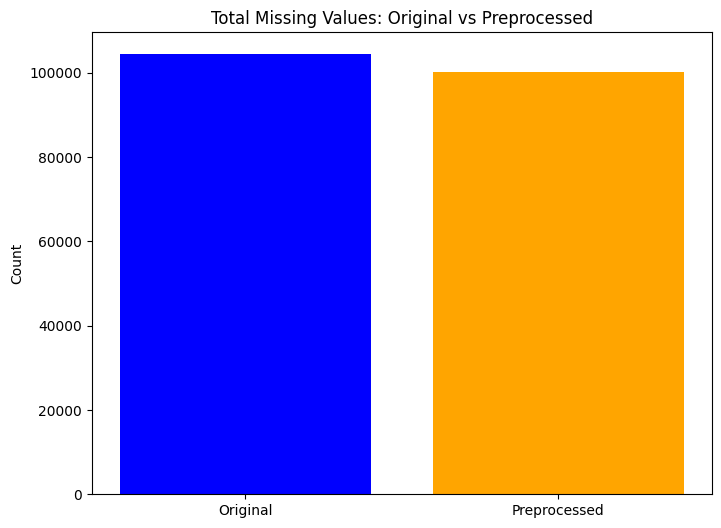

In [13]:
# 2. **Missing Values Comparison**
original_missing = original_data.isnull().sum().sum()
preprocessed_missing = preprocessed_data.isnull().sum().sum()

plt.figure(figsize=(8, 6))
plt.bar(['Original', 'Preprocessed'], [original_missing, preprocessed_missing], color=['blue', 'orange'])
plt.title('Total Missing Values: Original vs Preprocessed')
plt.ylabel('Count')
plt.show()

In [14]:
# 3. **Categorical Encoding Comparison**
original_categorical = original_data.select_dtypes(include=['object']).nunique()
preprocessed_categorical = preprocessed_data.select_dtypes(include=['uint8', 'int64', 'float64']).nunique()

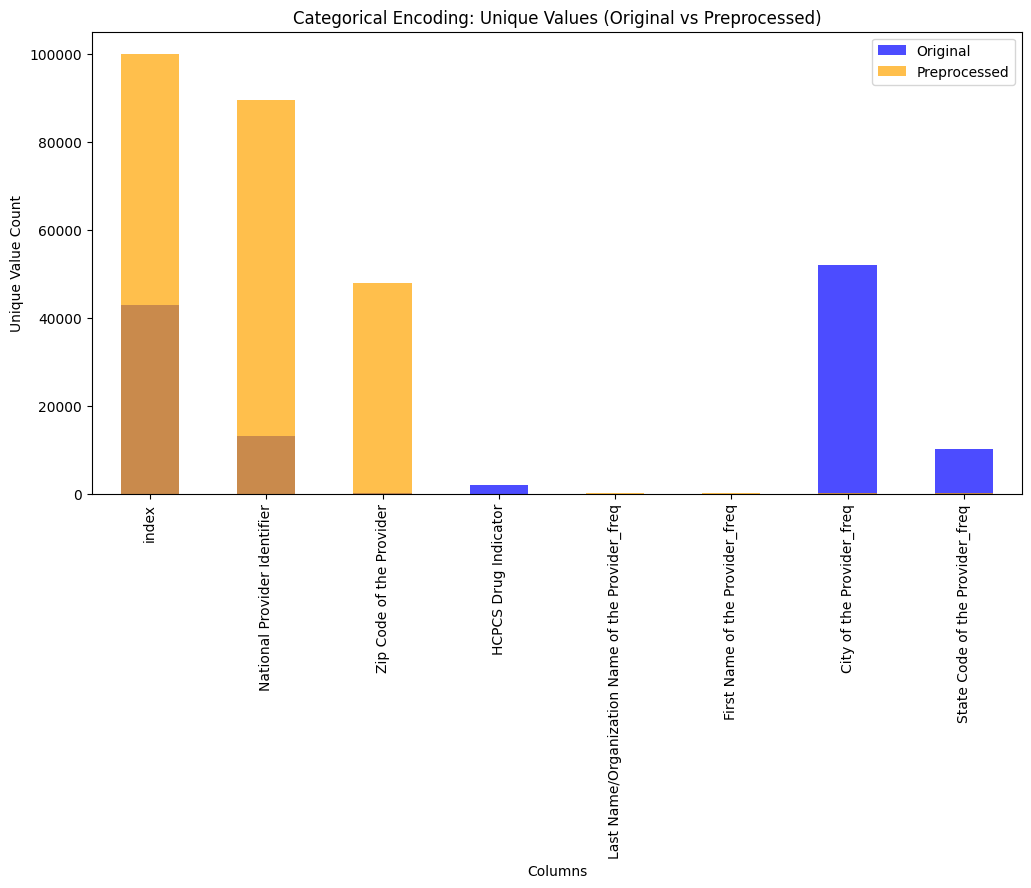

In [15]:
# Plot comparison of unique values for the first 10 columns
original_categorical.plot(kind='bar', figsize=(12, 6), color='blue', alpha=0.7, label='Original')
preprocessed_categorical[:10].plot(kind='bar', color='orange', alpha=0.7, label='Preprocessed')
plt.legend()
plt.title('Categorical Encoding: Unique Values (Original vs Preprocessed)')
plt.ylabel('Unique Value Count')
plt.xlabel('Columns')
plt.show()

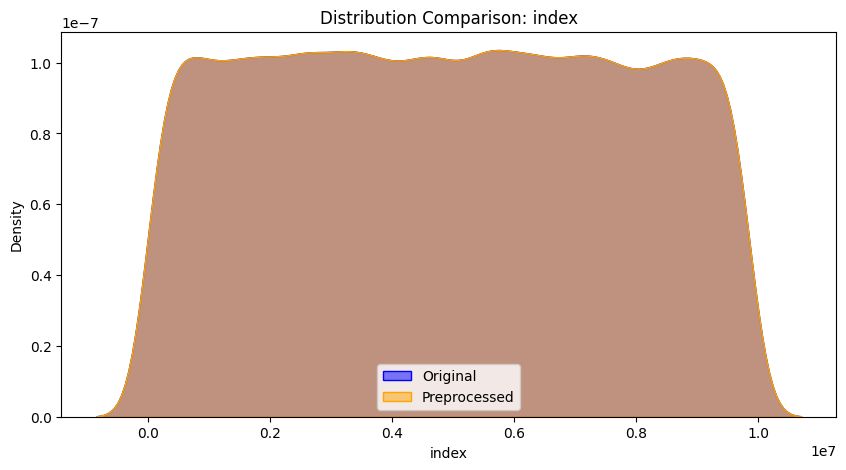

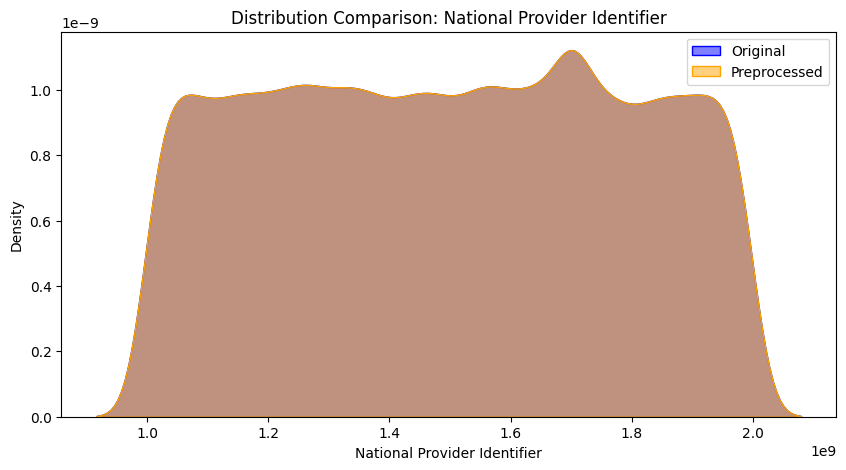

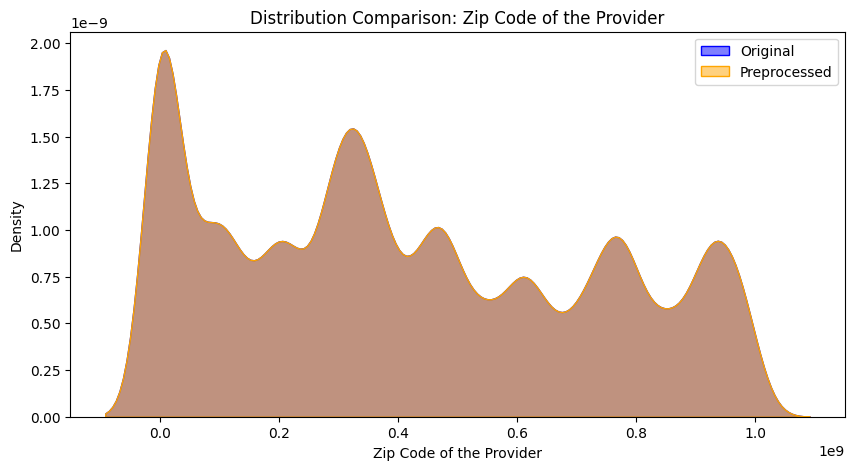

In [16]:
# 4. **Numerical Distribution Changes**
numerical_columns = original_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns[:5]:  # Plot for first 5 numerical columns
    plt.figure(figsize=(10, 5))
    sns.kdeplot(original_data[col].dropna(), label='Original', color='blue', fill=True, alpha=0.5)
    if col in preprocessed_data.columns:
        sns.kdeplot(preprocessed_data[col].dropna(), label='Preprocessed', color='orange', fill=True, alpha=0.5)
    plt.title(f'Distribution Comparison: {col}')
    plt.legend()
    plt.show()